<a href="https://colab.research.google.com/github/sergiopolimante/multiclass_image_classification/blob/main/Classifica%C3%A7%C3%A3o_Multiclasses_de_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Keras and Cifar10 dataset

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# @title Import the Libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
# @title Load the Dataset
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


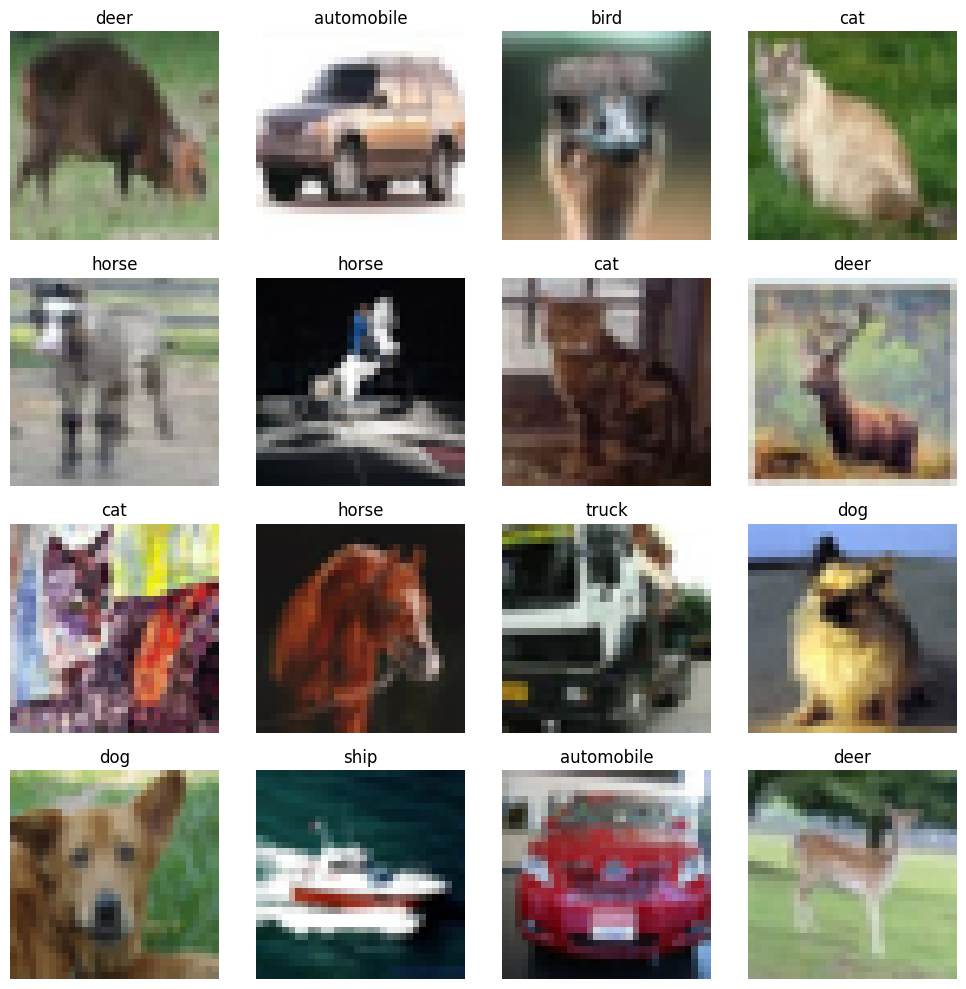

In [ ]:
# @title Preview Dataset Images
# Choose an index to select an image from the dataset

import matplotlib.pyplot as plt
import numpy as np
import random

# Define a list of class names for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Sample images and titles (replace with your own data)
indexes = random.sample(range(len(x_train)), 16)
images = x_train[indexes]
titles = np.array(class_names)[list(y_train[indexes].flatten())]

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Iterate through images and titles, and plot them
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(titles[i])
    ax.axis('off')  # Turn off axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# @title Pre-process the Dataset
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# @title Define the Model
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes for CIFAR-10
])


In [ ]:
# @title Another Metrics
# https://github.com/keras-team/keras/blob/1c630c3e3c8969b40a47d07b9f2edda50ec69720/keras/metrics.py
# from keras import backend as K

# def precision(y_true, y_pred):
#     """Precision metric.
#     Only computes a batch-wise average of precision.
#     Computes the precision, a metric for multi-label classification of
#     how many selected items are relevant.
#     """
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision


# def recall(y_true, y_pred):
#     """Recall metric.
#     Only computes a batch-wise average of recall.
#     Computes the recall, a metric for multi-label classification of
#     how many relevant items are selected.
#     """
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

In [ ]:
# @title Train the Model
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='accuracy'
              )

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5375 - accuracy: 0.4380 - val_loss: 1.2545 - val_accuracy: 0.5487
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1619 - accuracy: 0.5897 - val_loss: 1.0915 - val_accuracy: 0.6130
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0033 - accuracy: 0.6475 - val_loss: 1.0564 - val_accuracy: 0.6282
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9086 - accuracy: 0.6839 - val_loss: 0.9343 - val_accuracy: 0.6748
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8330 - accuracy: 0.7073 - val_loss: 0.8595 - val_accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7718 - accuracy: 0.7285 - val_loss: 0.8458 - val_accuracy: 0.7081
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7250 - accuracy: 0.7474 - val_loss: 0.8868 -

In [ ]:
# @title Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 3s - loss: 0.8403 - accuracy: 0.7198 - 3s/epoch - 10ms/step
Test accuracy: 0.7198


313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

    airplane       0.68      0.79      0.73      1000
  automobile       0.84      0.81      0.82      1000
        bird       0.66      0.58      0.62      1000
         cat       0.55      0.51      0.53      1000
        deer       0.71      0.66      0.68      1000
         dog       0.60      0.65      0.62      1000
        frog       0.81      0.79      0.80      1000
       horse       0.75      0.77      0.76      1000
        ship       0.84      0.81      0.83      1000
       truck       0.75      0.84      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



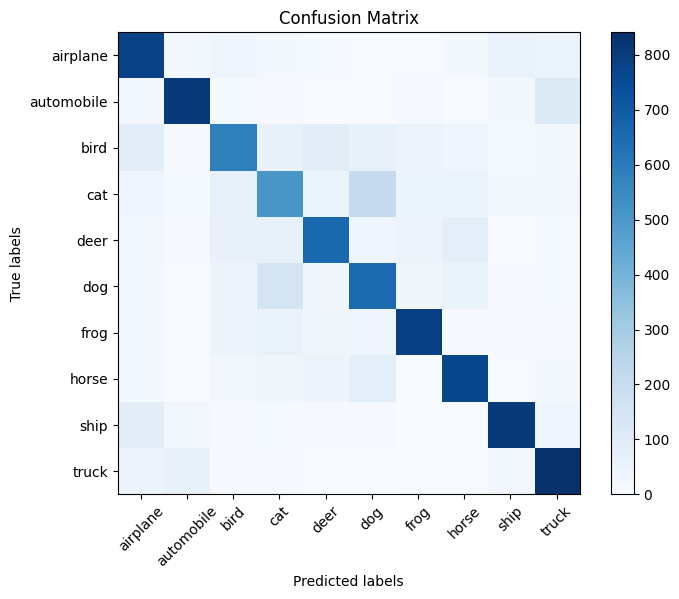

In [ ]:
# @title Make predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Generate a classification report and confusion matrix
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


1158

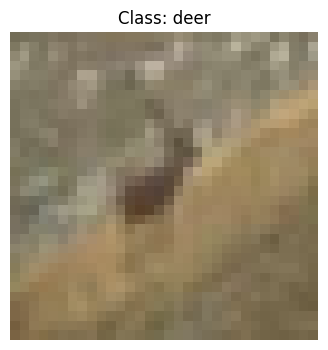


Making Prediction
1/1 [==============================] - 0s 20ms/step
Prediction:  deer



{'deer': 5.359664,
 'bird': 3.3832312,
 'cat': 1.6379747,
 'frog': -0.43976957,
 'dog': -0.9162356,
 'airplane': -1.3101524,
 'horse': -1.8175006,
 'ship': -3.7364016,
 'truck': -7.3692675,
 'automobile': -7.709878}

In [ ]:


# Choose an index to select an image from the dataset
image_index = 100  # Change this to view different images
image_index = random.randint(0, len(x_test))  # Change this to view different images

# Get the image and label from the dataset
image = x_test[image_index]
label = y_test[image_index][0]

# Define a list of class names for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Display the image and label
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(f"Class: {class_names[label]}")
plt.axis('off')  # Turn off axis labels
plt.show()


print()
print('Making Prediction')
predictions = model.predict(np.expand_dims(image, axis=0))
predictions

d = dict([(x,y) for (x,y) in zip(class_names, predictions[0])])
# d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
sorted_dict = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))


index = np.argmax(predictions)
print("Prediction: ", class_names[index])
print()
sorted_dict

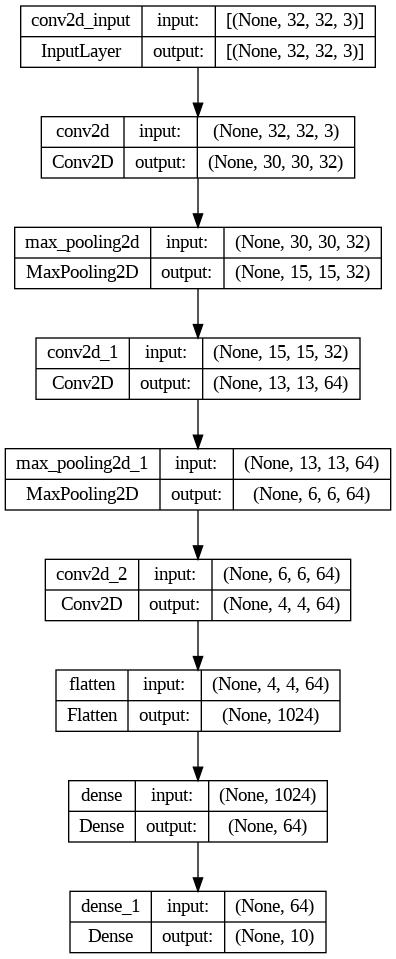

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0